In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from datetime import datetime
from scipy import stats
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV

In [2]:
df = pd.read_csv('datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.columns #This is to check all the column titles as I couldn't see all of them.

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
df.isnull().sum() #Checking if classes had nulls. 
#Knowing this provides insight as to which columns to include and which I shouldn't.

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [6]:
df.shape #Checking the 'shape', so how many columns and rows.

(2051, 81)

In [7]:
df.dtypes #Checking the data types of each column. Bringing insight to if I need to change something.

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [8]:
pd.set_option('display.max_columns', None) #I wanted to be able to see ALL the columns 

In [9]:
df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,

In [10]:
df[df.columns[df.isnull().any()]].isnull().sum()
#All the nulls in the dataframe per column as I couldn't see them before.

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
#This replaces the space between words with an underscore making it easier for me to call

In [12]:
new_df = df.drop(['fireplace_qu', 'pool_qc', 'fence','misc_feature', 'alley'], axis=1)

In [13]:
new_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [14]:
df['central_air'].isnull() 

0       False
1       False
2       False
3       False
4       False
        ...  
2046    False
2047    False
2048    False
2049    False
2050    False
Name: central_air, Length: 2051, dtype: bool

In [15]:
df['central_air'].replace(['Y'], 1, inplace=True)
df['central_air'].replace(['N'], 0, inplace=True)
    
df['bldg_type'].replace(['1Fam'], 1, inplace=True)
df['bldg_type'].replace(['2fmCon'], 2, inplace=True)
df['bldg_type'].replace(['Duplex'], 3, inplace=True)
df['bldg_type'].replace(['TwnhsE'], 4, inplace=True)
df['bldg_type'].replace(['TwnhsI'], 5, inplace=True)
df['bldg_type'].replace(['Twnhs'], 6, inplace=True)

df['garage_qual'].replace(['Ex'], 1, inplace=True)
df['garage_qual'].replace(['Gd'], 2, inplace=True)
df['garage_qual'].replace(['TA'], 3, inplace=True)
df['garage_qual'].replace(['Fa'], 4, inplace=True)
df['garage_qual'].replace(['Po'], 5, inplace=True)
df['garage_qual'].replace(['NA'], 6, inplace=True)


#Changing some varibles to a numeric form. I wanted to try this way instead of using...
# LabelEncoder to see if it worked as well. 
# I also didn't know if I was going to use these variables. 

In [16]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,3.0,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,3.0,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,3.0,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,3.0,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,3.0,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


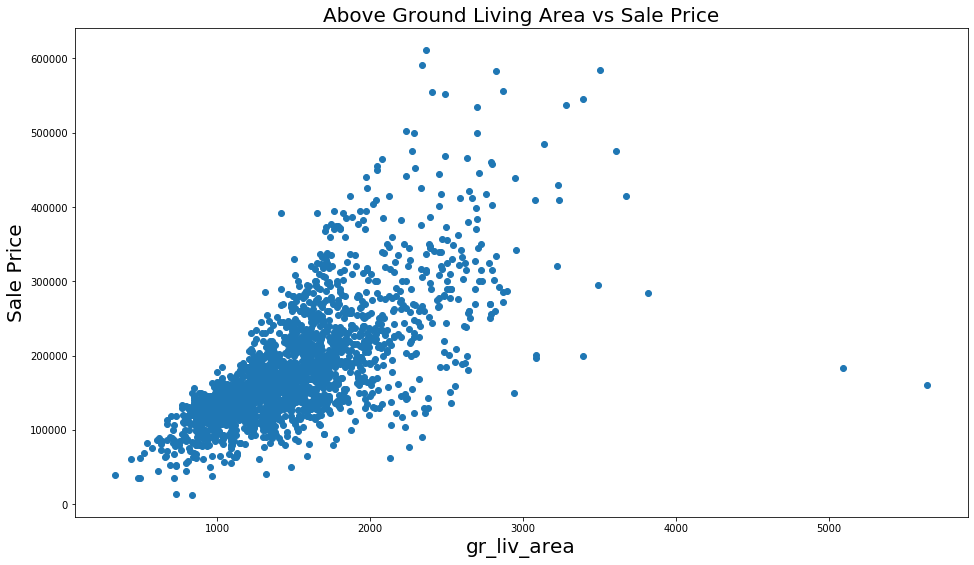

In [19]:
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(df['gr_liv_area'],
           df['saleprice'])

plt.title("Above Ground Living Area vs Sale Price", fontsize = 20)
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("gr_liv_area", fontsize = 20);

#Comparing between actual sq footage in a house vs the sale price. 
#There seems to be a strong correlation between these two. 
#There seems to be 2 promenent outliers 

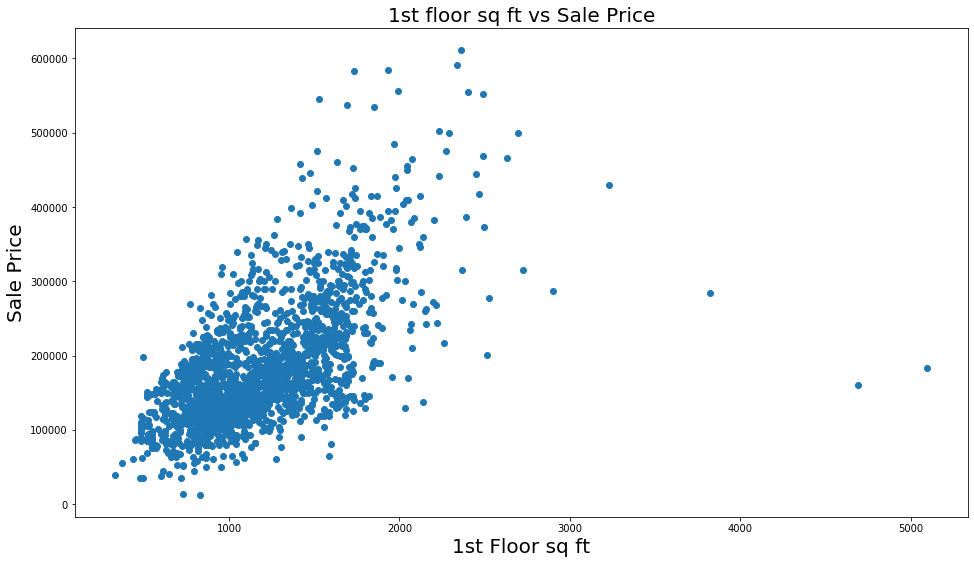

In [20]:
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(df['1st_flr_sf'],
           df['saleprice'])

plt.title("1st floor sq ft vs Sale Price", fontsize = 20)
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("1st Floor sq ft", fontsize = 20);

#Comparing the sale price to the square footage of the 1st floor

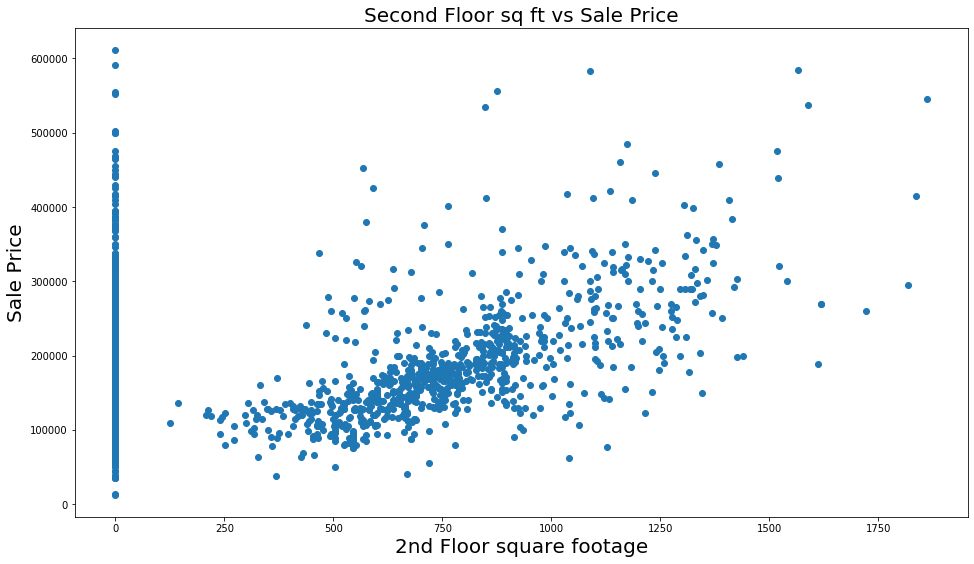

In [21]:
plt.figure(figsize=(16, 9))


plt.scatter(df['2nd_flr_sf'],
           df['saleprice'])

plt.title("Second Floor sq ft vs Sale Price", fontsize = 20)
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("2nd Floor square footage", fontsize = 20);

#There seems to be a lot of not empty entries but a large amount of 0. Meaning that a large portion of these houses...
#are either one floor or they just haven't entered the data. The former seems more likely. 

In [28]:
df['2nd_flr_sf'].isin([0]).sum()

1191

In [29]:
df.shape

(2051, 81)

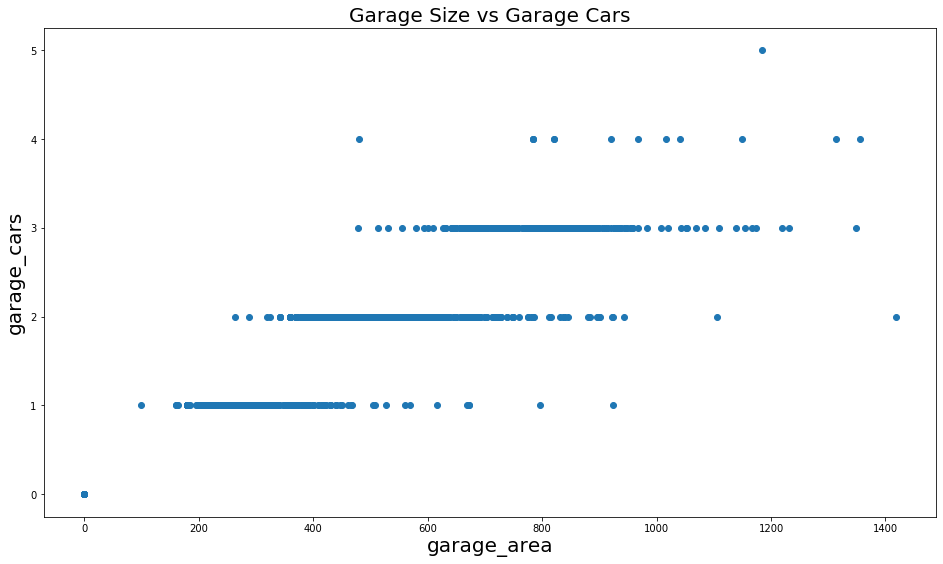

In [147]:
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(df['garage_area'],
           df['garage_cars'])

plt.title("Garage Size vs Garage Cars", fontsize = 20)
plt.ylabel("garage_cars", fontsize = 20)
plt.xlabel("garage_area", fontsize = 20);

#Comparing garage area vs the amount of cars per garage. 

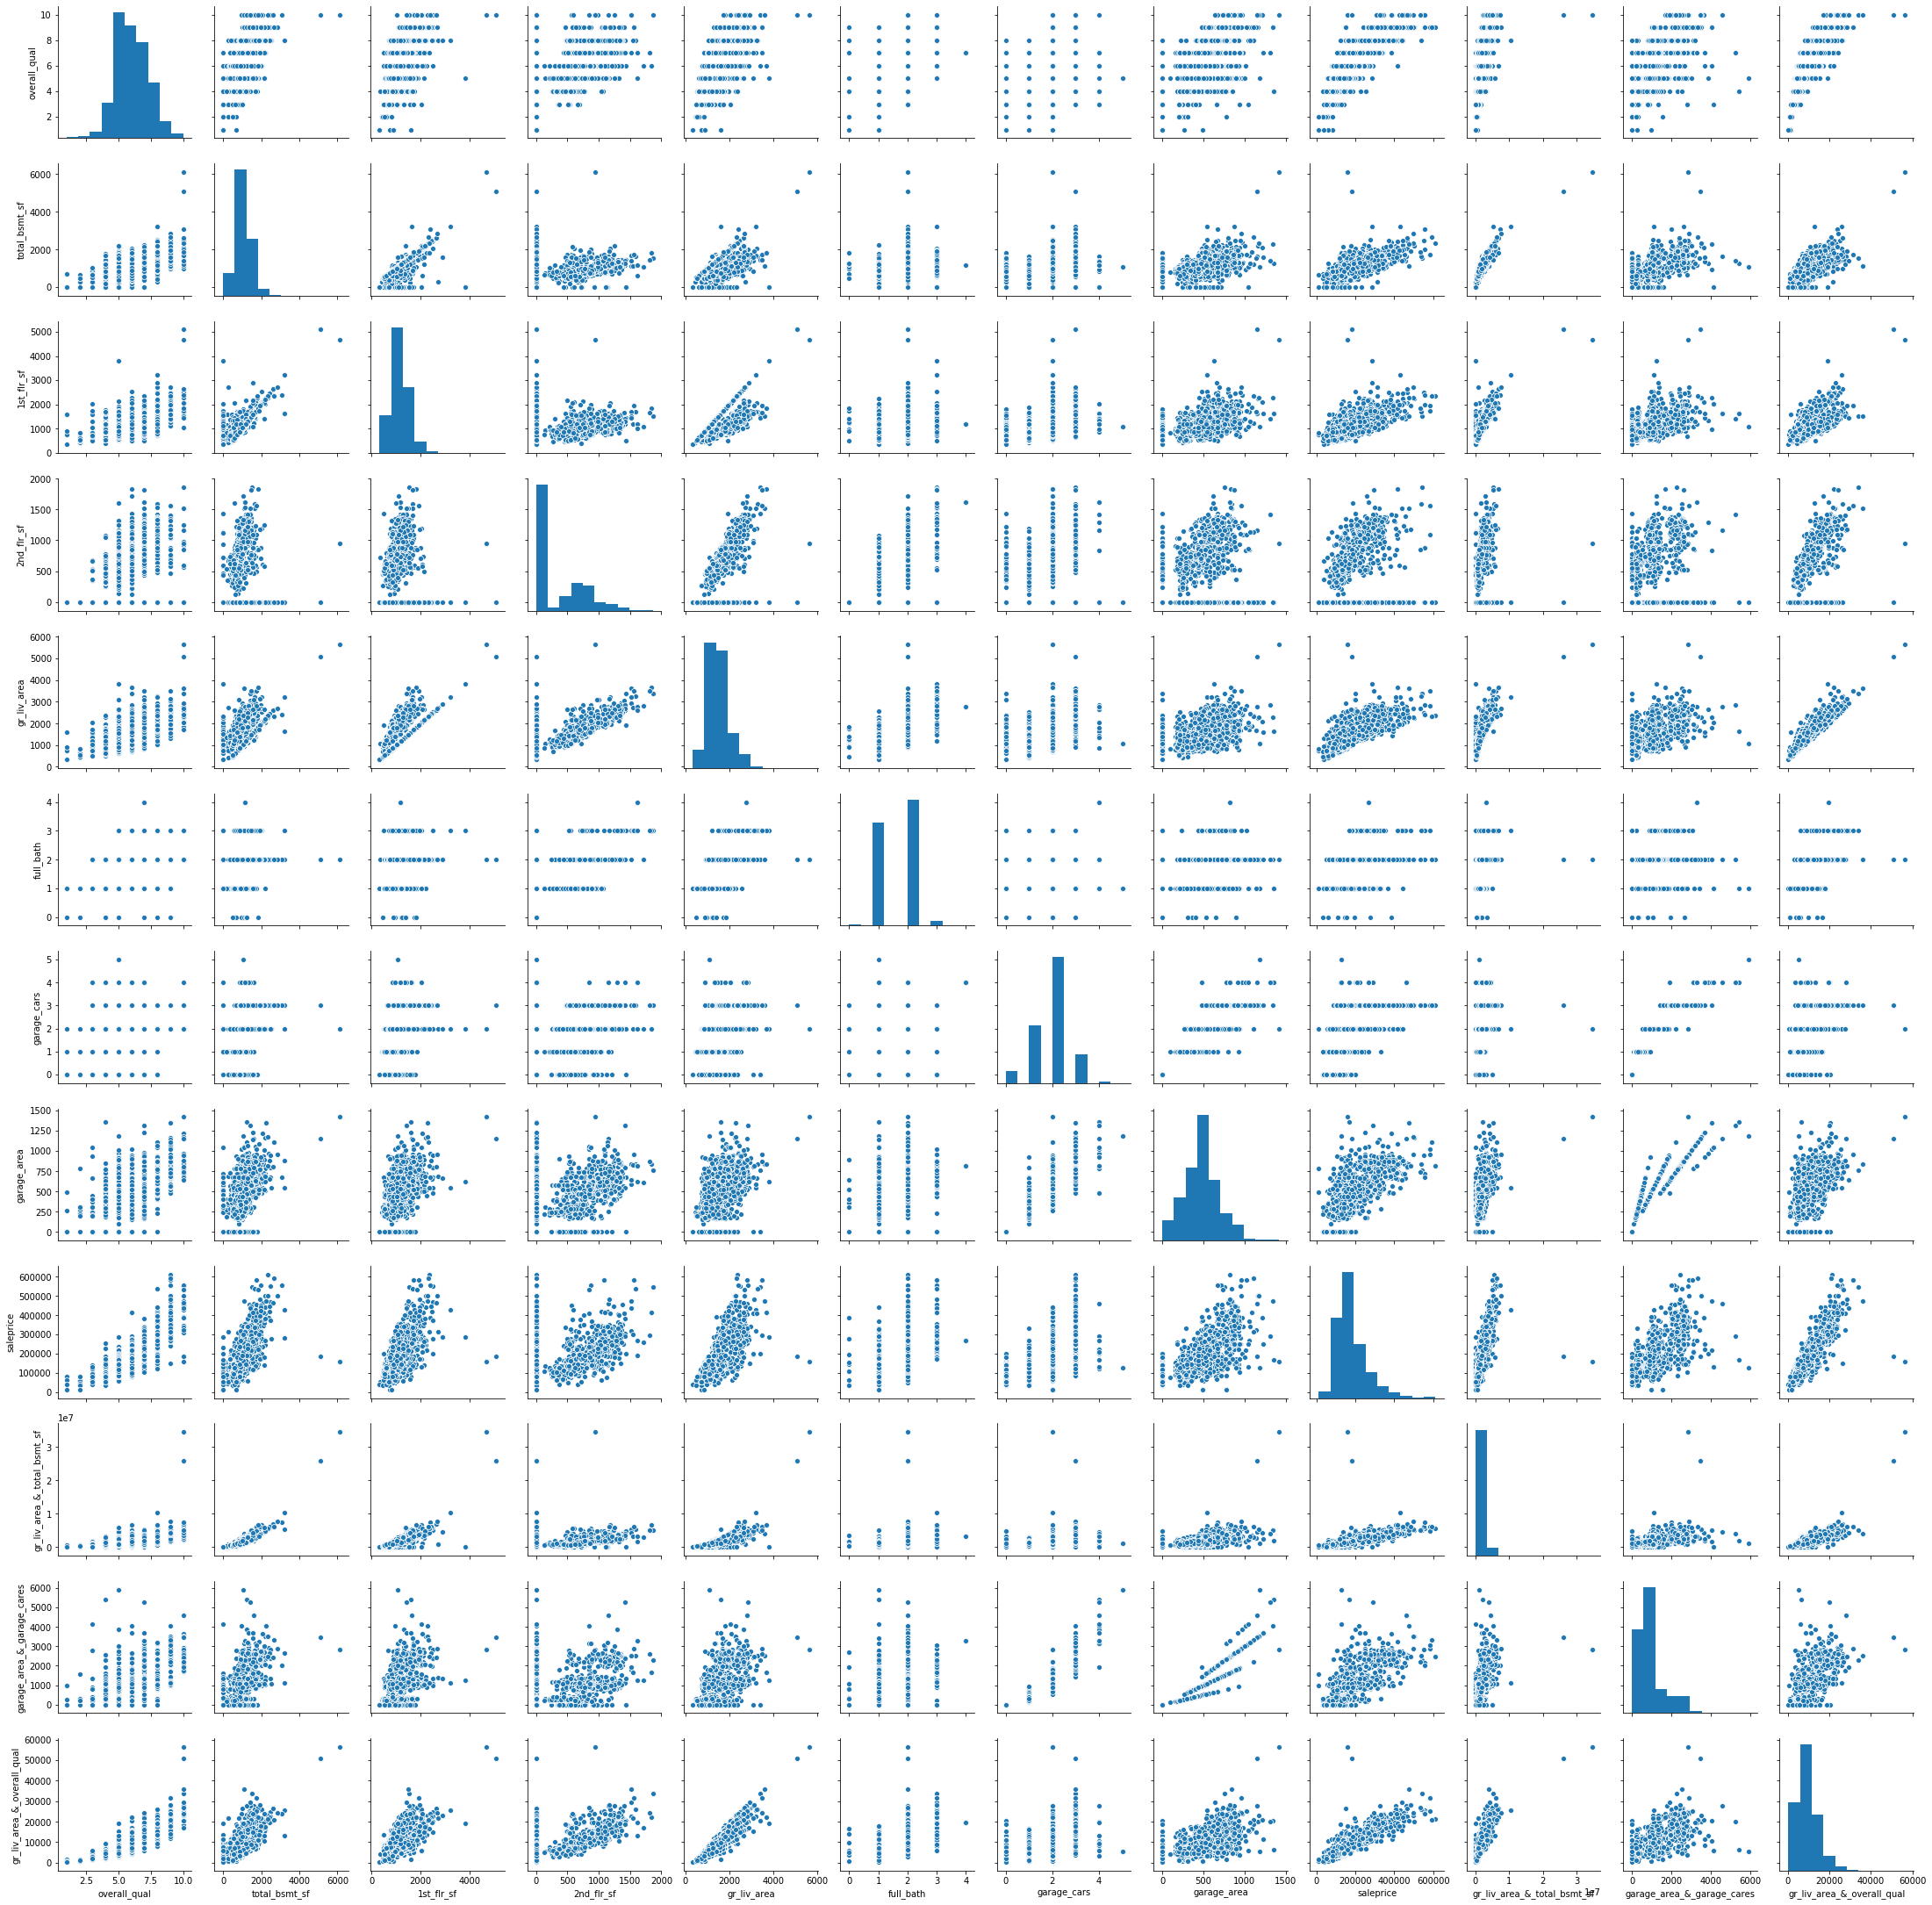

In [509]:
sns.pairplot(new_df)
#This is a big pairplot. It's a wonderful way to show the correlation between everthing. 
#While it is small, taking the extra time to look at it was very helpful.

In [149]:
df['gr_liv_area_&_total_bsmt_sf'] = df['gr_liv_area'] * df['total_bsmt_sf']
df['garage_area_&_garage_cares'] = df['garage_area'] * df['garage_cars']
df['gr_liv_area_&_overall_qual'] = df['overall_qual'] * df['gr_liv_area']
#Creating intersection columns to see if just adding a few was more beneficial instead of...
#adding all of them with poly features.

In [150]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [151]:
new_df = df.drop(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style','overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'heating', 'heating_qc', 'central_air', 'electrical', 'low_qual_fin_sf',
        'bsmt_full_bath','bsmt_half_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_yr_blt','garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc',
       'fence', 'misc_feature', 'misc_val', 'mo_sold', 'yr_sold', 'sale_type' ], axis=1)

#Creating a new varaible that will store all the variables I want and NOT the ones I found to be useless.

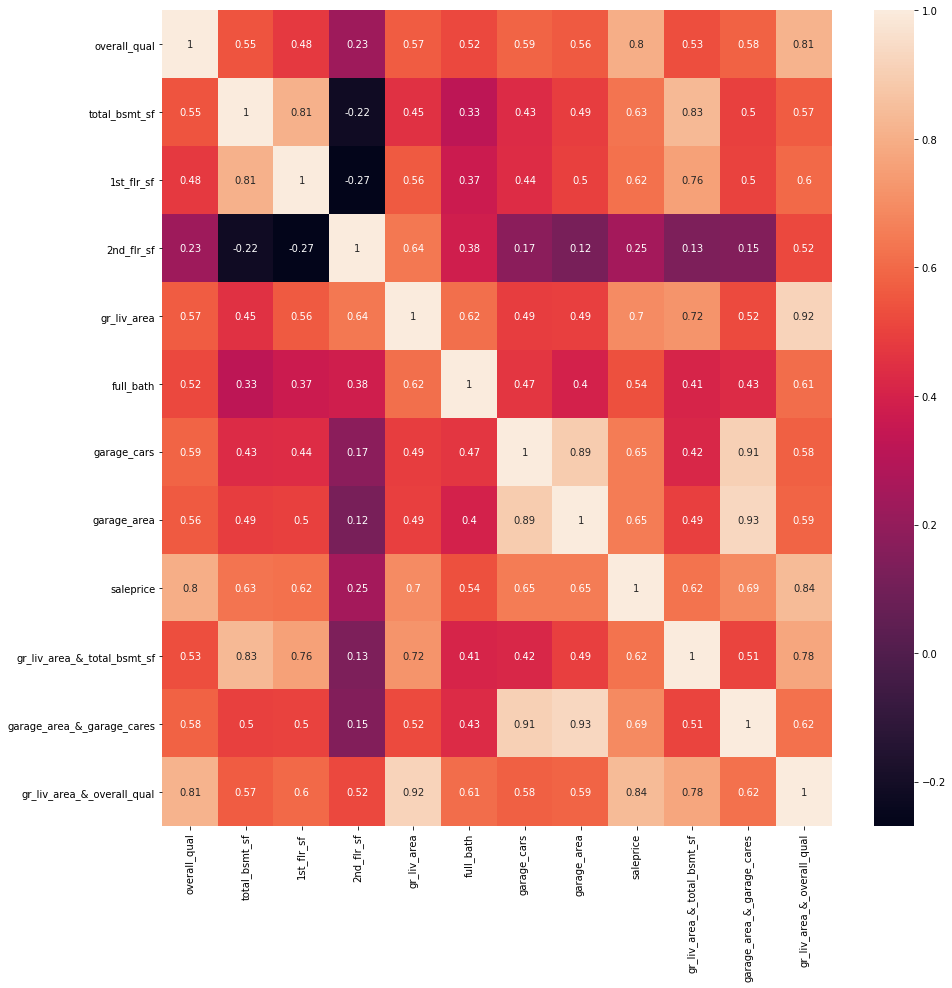

In [25]:
plt.figure(figsize = (15,15))


sns.heatmap(new_df.corr(), annot=True)
#Here is a heatmap which displays the correlation between what seems to have the strongest relationship with saleprice
#This also includes the variables I have combined to create "super variables"

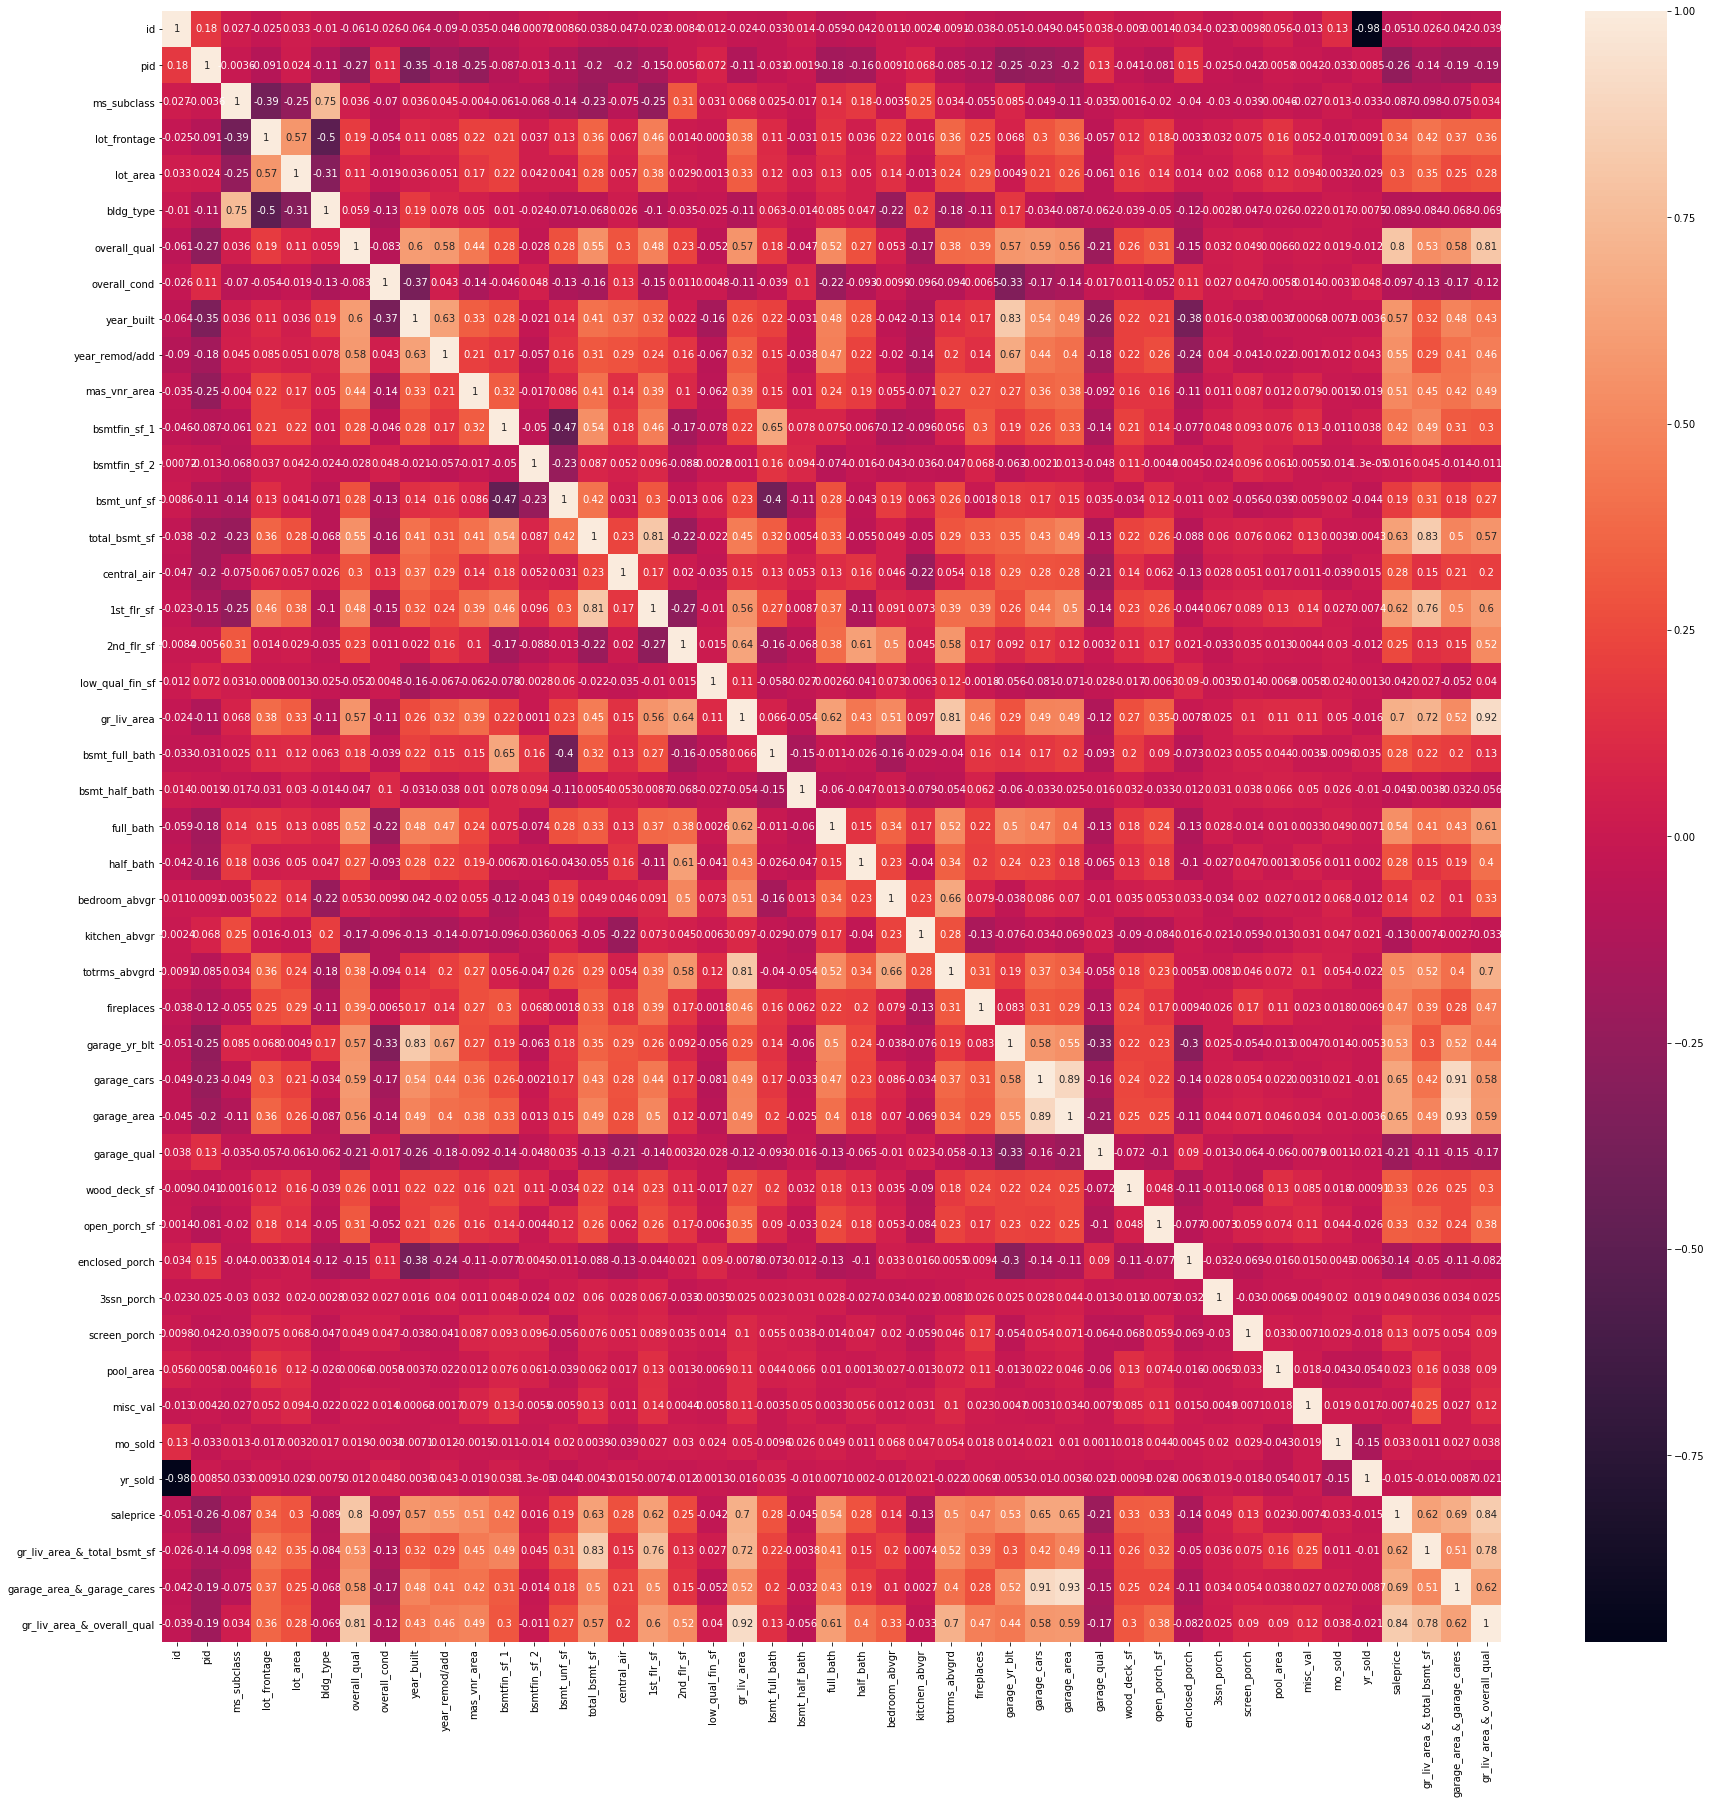

In [26]:
plt.figure(figsize = (30,30))


sns.heatmap(df.corr(), annot=True)
#A heatmap to show the correaltion between EACH variable. Just for comparision sake. 

In [412]:
X = df[['garage_area', 'garage_cars', 'gr_liv_area', 'overall_qual', 'total_bsmt_sf', '1st_flr_sf',]]
#prepare to train and test my data. So creating the required variable

In [413]:
le = LabelEncoder()
df['kitch_qual'] = le.fit_transform(df['kitchen_qual'])

#Using label encoder to encode the variable. I tested it but found that it wasn't really needed...
#as it didn't really provide any improvement to the model. 

In [414]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,gr_liv_area_&_total_bsmt_sf,garage_area_&_garage_cares,gr_liv_area_&_overall_qual,kitch_qual
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,3.0,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,1072275.0,950.0,8874,2
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,3.0,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,1937386.0,1118.0,14854,2
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,3.0,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,1117249.0,246.0,5285,2
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,3.0,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,554496.0,800.0,7220,3
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,3.0,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,976820.0,968.0,8670,3


# EDA done...for now

In [415]:
X = df[['garage_area', 'garage_cars', 'gr_liv_area', 'overall_qual', 'total_bsmt_sf', '1st_flr_sf', 'full_bath', 'gr_liv_area_&_overall_qual', 'garage_area_&_garage_cares', 'gr_liv_area_&_overall_qual']]
y = df['saleprice']



In [416]:
X.isnull().sum()

garage_area                   1
garage_cars                   1
gr_liv_area                   0
overall_qual                  0
total_bsmt_sf                 1
1st_flr_sf                    0
full_bath                     0
gr_liv_area_&_overall_qual    0
garage_area_&_garage_cares    1
gr_liv_area_&_overall_qual    0
dtype: int64

In [417]:
X.shape

(2051, 10)

In [418]:
y.shape

(2051,)

In [419]:
lr = LinearRegression()
#Making a variable to for Linear Regression so it's easier to call. 

In [420]:
X = np.nan_to_num(X)
#There are NaN's in the chart but removing them with dropna() affects the structure of the model making it 'unrunable'.
#This gives the NaN a number 

In [421]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
X = df[['garage_area', 'garage_cars', 'gr_liv_area', 'overall_qual', 'total_bsmt_sf', '1st_flr_sf', 'full_bath']]
X = np.nan_to_num(X)

X_poly = poly.fit_transform(X)

#This is multiplying all variables in X by each other. So taking the second power of each combo

In [422]:
cross_val_score(lr, X_poly, y, cv = 5).mean()

0.8445436588527299

## Train/test/split

In [ ]:
lr = LinearRegresssion()

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.25, random_state = 24)


In [424]:
lr.fit(X_train, y_train)
#We are fitting the model for LR allowing us to now be able to check the score or how well the model performs.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [425]:
lr.score(X_train, y_train)
#The training data is 86% accurate

0.8648849797710315

In [426]:
lr.score(X_test, y_test)
#The test data is 87.4% accuracy. 

0.8747553612064318

In [427]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#Making a variable for StandardScaler
# This allows me to not have to write the whole thing again. 
#Scaling allows us to bring the data set in a smaller range by scaling it down to an easier and more managable size. 

# Linear Regression

In [ ]:
#This section we use the newly shrunk down variables. To make sure that when you shrink it you get the same values.

In [428]:
lr.fit(X_train_ss, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [429]:
lr.score(X_train_ss, y_train)

0.8648849797710314

In [430]:
lr.score(X_test_ss, y_test)

0.8747553612102057

In [431]:
lr.coef_

array([-9.00153137e+03,  3.82948480e+03, -7.17380038e+03, -1.55486762e+04,
       -4.10562751e+03,  6.01473452e+03, -1.27943754e+04,  1.18256776e+04,
       -5.94772097e+03,  1.23956136e+04,  1.58520703e+04, -8.98521144e+03,
       -1.79253168e+04,  1.00484890e-01, -1.47839584e+04,  1.24090119e+04,
        9.23708125e+03,  4.30937997e+03,  2.48521484e+04, -1.53571112e+04,
       -3.70523868e+04,  7.26036300e+04,  4.40910273e+04, -9.36004165e+04,
        5.56349649e+04, -1.95751769e+04,  5.49859490e+04,  3.09973137e+04,
       -1.36730172e+04, -1.08957637e+03, -7.46255885e+04, -1.10152621e+03,
        5.57609335e+04, -6.40448757e+03,  4.26481418e+03])

# Ridge Model

In [ ]:
#Now using a Ridge Model to see if other models perform better or worse than one another.

In [432]:
from sklearn.linear_model import Ridge

In [433]:
rm = Ridge(alpha=11)

In [434]:
# rm.fit(X_train, y_train)

In [435]:
r_alphas = np.logspace(0, 5, 100)

rm = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!

rm = rm.fit(X_train_ss, y_train)

In [436]:
rm.alpha_

11.497569953977356

In [437]:
rm.score(X_train_ss, y_train)

0.8589695109183173

In [438]:
rm.score(X_test_ss, y_test)

0.8718711899161485

In [439]:
X_train_ss.shape

(1538, 35)

In [440]:
y_train.shape

(1538,)

In [441]:
rm.coef_

array([ -2960.53107762,  -6545.062576  ,   1706.91716298, -17325.00089414,
         2881.75151877,   8094.93365846, -15353.33244027,   2965.40899696,
        -1866.90572874,   4525.10387134,  15280.69757409,  -5273.9499863 ,
        -5830.76148762,  -3154.27192961,  -9956.57852627,  18860.3855439 ,
         8883.90231838,  10808.4468659 ,  11336.2515811 ,  -8313.27950386,
       -19067.82873107,  34069.43934862,  -3766.70814847, -19817.5129569 ,
        28705.16792322,   4838.74096633,  34512.78540194,  23880.74262314,
        -1630.49328924,  -9112.66598883, -19548.8416216 ,   2666.11986474,
        -6905.47343477,  -1556.75116093,   6979.29296058])

# Lasso Model

In [ ]:
#Same as the top two, getting as many values as possible to see which performs the best.

In [442]:
lasso = LassoCV(n_alphas = 132)


In [443]:
lasso.fit(X_train_ss, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17668373839.7854, tolerance: 990359079.1525028
  positive)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=132, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [444]:
lasso.fit(X_test_ss, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378946882.28118896, tolerance: 243170623.24060196
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340032396.94451904, tolerance: 243170623.24060196
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384562692.52957153, tolerance: 243170623.24060196
  tol, rng, random, positive)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=132, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [445]:
lasso.score(X_train_ss, y_train)

0.7452659380015537

In [446]:
lasso.score(X_test_ss, y_test)

0.8811021645917579

In [447]:
lasso.coef_

array([-8941.0024559 , -4559.76031238,     0.        , -1080.89929212,
          -0.        ,     0.        ,  3563.4322285 ,     0.        ,
           0.        ,     0.        , 26166.51259632,     0.        ,
        2920.00831994,    -0.        ,    -0.        , 13298.50630441,
           0.        ,    -0.        ,     0.        ,    -0.        ,
           0.        , 25794.49965569,     0.        ,     0.        ,
         771.40724962,    -0.        , 32813.80486137,   829.05272676,
           0.        ,    -0.        ,    -0.        , -9357.54020864,
           0.        ,     0.        ,     0.        ])

In [449]:
cross_val_score(lasso, X_train_ss, y_train, cv = 5).mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4172104246.6116943, tolerance: 778965763.5296867
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852031570.7678223, tolerance: 648001960.2868625
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781804175.4089355, tolerance: 648001960.2868625
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increas

0.7962921100501342

In [450]:
test_df = pd.read_csv('datasets/test.csv')

In [451]:
test_df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

In [452]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [477]:
test_df.columns = test_df.columns.str.lower().str.replace(' ', '_')

In [478]:
test_df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [467]:
test_X = test_df[['garage_area', 'garage_cars', 'gr_liv_area', 'overall_qual', 'total_bsmt_sf', '1st_flr_sf', 'full_bath']]
test_X = np.nan_to_num(test_X)
test_X_poly = poly.fit_transform(test_X)


In [468]:
test_X_test_ss = ss.transform(test_X_poly)

In [471]:
lr.predict(test_X_test_ss)

array([194608.12469341, 168669.70839315, 162306.08653418, 130823.3305408 ,
       189807.68529456,  99362.30494701, 109676.0341661 , 140412.0270045 ,
       199721.85553439, 166541.5693176 , 161227.17604144, 155536.9740859 ,
       188618.03686677, 360131.51604149, 151896.26886231, 118998.85542257,
       174746.51859517, 128812.21298777, 204902.52928311, 218638.28728211,
       128993.91057546, 123697.15179069, 200611.45280332, 147107.29228181,
       197270.80863027, 112698.76527482, 116740.88655934, 119092.47507609,
       152447.34440855,  72397.26257406, 103391.74909267, 115321.9029878 ,
       272666.22220417, 148846.4297225 , 219966.73524525, 155995.88254114,
       114464.01898875, 103017.44570123, 102065.90056756, 202097.37920411,
       127515.89806347, 214842.44699649, 152762.65839825, 136838.79237303,
       220618.09196135,  84586.63021601, 214208.4235266 , 118083.15370952,
       119207.64069588, 127047.86148258, 129248.64886948, 242606.41900554,
       280740.98554681, 1

In [472]:
lasso.predict(test_X_test_ss)

array([179569.23149796, 195932.67027252, 172852.78063507, 126235.42013608,
       183449.91574111,  96001.57035818, 105146.32419718, 137306.76069767,
       199730.78845182, 165722.44345913, 163784.08630231, 143133.44007498,
       178298.56978803, 308589.36983787, 160793.84942134, 101985.23582234,
       178942.41535926, 127573.98785704, 190950.71529421, 217211.82610687,
       124272.93430957, 126995.10136307, 197759.27164651, 147393.31397029,
       194126.9266734 , 114133.25513782, 123252.21586205, 133503.28973856,
       147697.40945439,  70772.51810972, 105085.93741354, 112747.0210635 ,
       310849.68830074, 140283.18960319, 218966.83367503, 170653.13765811,
       124145.95751367,  87013.26351834,  95638.22078736, 206867.49500795,
       145722.75395752, 204440.91220075, 150221.96582264, 134260.1828385 ,
       213536.09910479,  94741.08180467, 209733.98322483, 114955.3719972 ,
       117409.05667042, 124276.76152088, 121943.77614906, 242529.18053605,
       284759.06322225, 1

In [473]:
rm.predict(test_X_test_ss)

array([181066.79186419, 179799.89720177, 163884.77545938, 128952.18042713,
       186387.45909349,  95508.40931445, 109550.91687701, 137788.3549424 ,
       196364.34223473, 169191.0484528 , 165388.54614832, 151297.326936  ,
       183889.19481801, 353871.94850499, 157458.57912576, 110269.83579903,
       169151.91669626, 128336.59651739, 200414.56653165, 219623.74190178,
       126871.0562787 , 122988.64084554, 200722.1150231 , 147808.66557999,
       197108.10320551, 113435.58864858, 125806.34048185, 132418.23726856,
       151367.26086427,  68947.04153444, 104298.11905133, 115538.94788944,
       296234.56690922, 146147.94256561, 221744.32395534, 157704.99085008,
       122009.85250287,  87240.91829471,  92551.89546613, 207165.54927039,
       128515.91734874, 210854.88451798, 152395.20055643, 135912.28583202,
       221037.85438867,  91254.386953  , 209272.17647089, 117150.9977931 ,
       118593.69281871, 125931.42528557, 125590.89783386, 256062.48247065,
       285748.92686815, 1

In [498]:
kaggle_ridge_subs = pd.DataFrame()
kaggle_ridge_subs['id'] = test_df['id']

In [499]:
kaggle_ridge_subs['saleprice'] = rm.predict(test_X_test_ss)

In [500]:
kaggle_ridge_subs.head()

,id,saleprice
0,2658,181066.791864
1,2718,179799.897202
2,2414,163884.775459
3,1989,128952.180427
4,625,186387.459093


In [501]:
predictions

In [502]:
kaggle_lasso_subs = pd.DataFrame()

In [503]:
kaggle_lasso_subs['id'] = test_df['id']

In [504]:
kaggle_lasso_subs['saleprice'] = lasso.predict(test_X_test_ss)

In [505]:
kaggle_ridge_subs.to_csv('kaggle_lasso_subs.csv', index=False)